# Mengunduh dan menginstall pustaka yang diperlukan

In [1]:
!pip install opencv-python-headless
!pip install matplotlib


# Tahapan Pengecekkan
1. Akuisisi Gambar
(Unggah gambar uang asli (referensi) dan uang yang akan diuji)

Unggah gambar referensi (uang asli):


Saving 100rb.jpg to 100rb (1).jpg
Unggah gambar uji (uang asli atau palsu):


Saving 100rb.jpg to 100rb (2).jpg


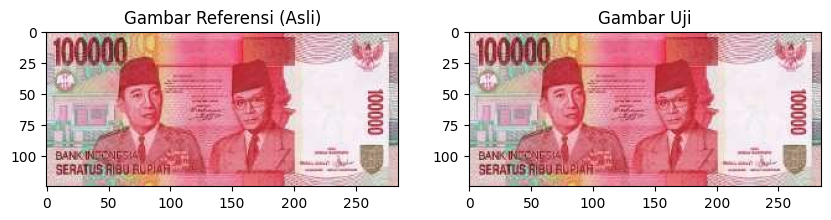

In [6]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

print("Unggah gambar referensi (uang asli):")
uploaded_ref = files.upload()
print("Unggah gambar uji (uang asli atau palsu):")
uploaded_test = files.upload()

# Membaca gambar
ref_image = cv2.imread(list(uploaded_ref.keys())[0])
test_image = cv2.imread(list(uploaded_test.keys())[0])

# Tampilkan gambar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB))
plt.title("Gambar Referensi (Asli)")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title("Gambar Uji")
plt.show()


2. Prapemrosesan Citra (Konversi gambar ke skala abu-abu, lakukan histogram equalization, dan binarisasi)

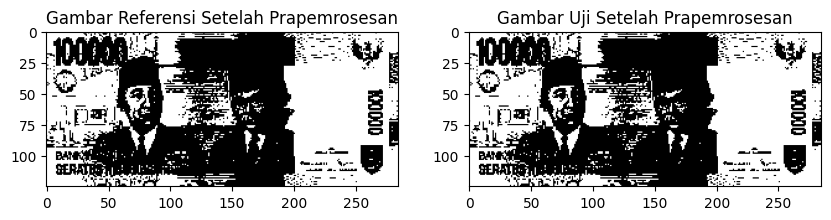

In [7]:
# Fungsi prapemrosesan
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Konversi ke skala abu-abu
    equalized = cv2.equalizeHist(gray)  # Histogram equalization
    _, binary = cv2.threshold(equalized, 128, 255, cv2.THRESH_BINARY)  # Binarisasi
    return binary

# Prapemrosesan
ref_binary = preprocess_image(ref_image)
test_binary = preprocess_image(test_image)

# Tampilkan hasil prapemrosesan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ref_binary, cmap="gray")
plt.title("Gambar Referensi Setelah Prapemrosesan")
plt.subplot(1, 2, 2)
plt.imshow(test_binary, cmap="gray")
plt.title("Gambar Uji Setelah Prapemrosesan")
plt.show()


3. Deteksi Tepi (Menggunakan operator Canny untuk mendeteksi tepi gambar)

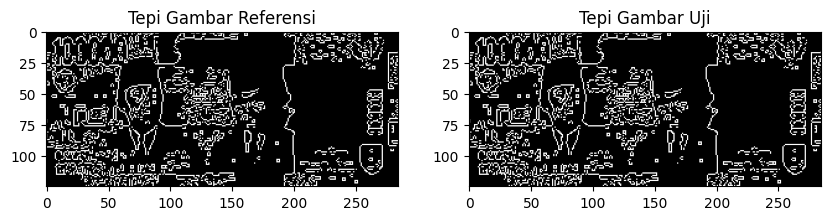

In [8]:
def edge_detection(image):
    edges = cv2.Canny(image, 50, 150)  # Deteksi tepi dengan Canny
    return edges

# Deteksi tepi
ref_edges = edge_detection(ref_binary)
test_edges = edge_detection(test_binary)

# Tampilkan hasil deteksi tepi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ref_edges, cmap="gray")
plt.title("Tepi Gambar Referensi")
plt.subplot(1, 2, 2)
plt.imshow(test_edges, cmap="gray")
plt.title("Tepi Gambar Uji")
plt.show()


4. Ekstraksi dan perbandingan fitur (Mengekstraksi fitur seperti luas (jumlah piksel tepi) dan bandingkan dengan gambar referensi)

In [9]:
import numpy as np

def extract_features(edges):
    return np.sum(edges > 0)  # Menghitung jumlah piksel tepi

# Ekstraksi fitur
ref_features = extract_features(ref_edges)
test_features = extract_features(test_edges)

# Bandingkan hasil
print(f"Jumlah piksel tepi (referensi): {ref_features}")
print(f"Jumlah piksel tepi (uji): {test_features}")

# Menentukan asli atau palsu
threshold = ref_features * 1.1  # Ambang batas (10% lebih besar dari referensi)
if test_features <= threshold:
    print("Hasil: Uang Asli")
else:
    print("Hasil: Uang Palsu")


Jumlah piksel tepi (referensi): 5102
Jumlah piksel tepi (uji): 5102
Hasil: Uang Asli
